<a href="https://colab.research.google.com/github/JoshuaOmondi/Data-Projects/blob/master/e_commerce_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('data.csv', encoding = 'unicode_escape')


In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.shape

(541909, 8)

In [7]:
#checking for duplicates
df.duplicated().sum()

5268

In [8]:
#dropping duplicates
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
#checking for missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [11]:
#handling missing values
copy = df.copy()
copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#handling missing values in our main data
df['Description'] = df['Description'].fillna("Unknown")
df['CustomerID'] = df['CustomerID'].fillna(0)

In [13]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#converting to appropriate data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Quantity'] = pd.to_numeric(df['Quantity'])
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [ ]:
#separating the InvoiceDate column into separate columns
df['Time'] = df['InvoiceDate'].dt.time
#creating a separate column for month
df['Month'] = df['InvoiceDate'].dt.month_name()
#creating a separate column for day name
df['Day'] = df['InvoiceDate'].dt.day_name()
#creating a column for year
df['Year']= df['InvoiceDate'].dt.year

In [ ]:
#creating a column for total
df['Total'] = df['Quantity']*df['UnitPrice']

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34


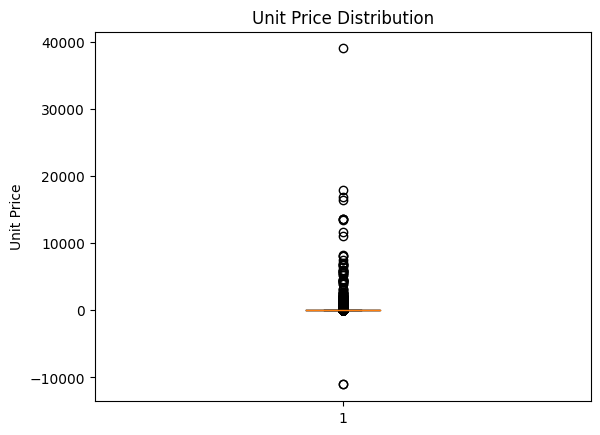

In [19]:
# Showing the distribution of Unit Price using a Box Plot
plt.boxplot(df['UnitPrice'])

# Add a title and label the axes
plt.title('Unit Price Distribution')
plt.ylabel('Unit Price')

# Show the plot
plt.show()


In [20]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0.0,United Kingdom,14:51:00,August,Friday,2011,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0.0,United Kingdom,14:52:00,August,Friday,2011,-11062.06


In [21]:
df[df['Description'].str.contains('debt', case=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,0.0,United Kingdom,14:50:00,August,Friday,2011,11062.06
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0.0,United Kingdom,14:51:00,August,Friday,2011,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0.0,United Kingdom,14:52:00,August,Friday,2011,-11062.06


In [22]:
mask = df['Description'].str.contains('debt', case=False)
# Invert mask and use boolean indexing to filter out rows
df = df[~mask]

In [23]:
#filtering our data
df = df[df['UnitPrice']>0]

In [24]:
#check the minimum
df['UnitPrice'].min()

0.001

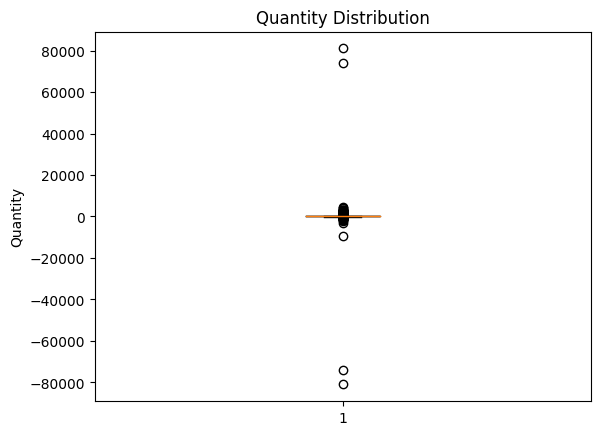

In [25]:
# Showing the distribution of Quantity using a box plot
plt.boxplot(df['Quantity'])

# Add a title and label the axes
plt.title('Quantity Distribution')
plt.ylabel('Quantity')

# Show the plot
plt.show()

In [26]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,09:41:00,December,Wednesday,2010,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,09:49:00,December,Wednesday,2010,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,09:57:00,December,Friday,2011,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,10:28:00,December,Friday,2011,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,11:57:00,December,Friday,2011,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,11:58:00,December,Friday,2011,-1.25


In [27]:
cancelled_purchases = df[df['Quantity'] < 0]

In [28]:
#modifying our dataframe to contain only purchased products
df = df[df['Quantity']>0]

In [29]:
# check min to confirm for positive quantity
df['Quantity'].min()

1

In [29]:
#converting the df to a csv
# File path to store the CSV file
csv_file_path = 'ecommerce.csv'

# Save the DataFrame to CSV
df.to_csv(csv_file_path, index=False)

print(f"DataFrame has been saved to {csv_file_path}.")

DataFrame has been saved to ecommerce.csv.


##Analysis

To begin, let us try and establish what hours during the day do most sales occur. With such insights, we can be able to identify the most appropriate time when an online advertisement should be used for maximum effect.

In [30]:
#lets create a new column for hours, fetched from InvoiceDate field
df['Hour']=df['InvoiceDate'].dt.hour

In [32]:
BestTimeAds = df.groupby('Hour').count().reset_index()

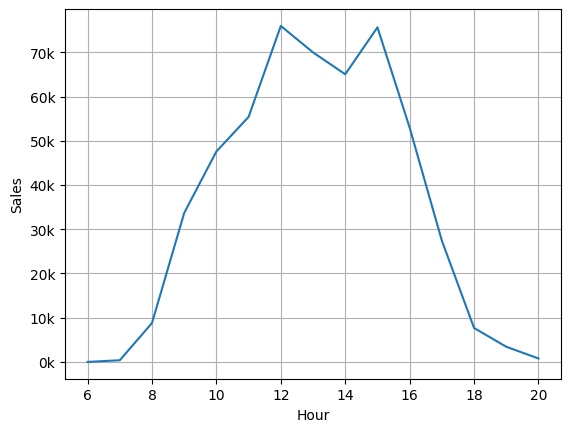

In [33]:
from matplotlib.ticker import StrMethodFormatter
plt.plot(BestTimeAds['Hour'],BestTimeAds['InvoiceNo']/1000)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid()
formatter = StrMethodFormatter('{x:.0f}k')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

From the visual, most sales happen around 12 noon and 3 p.m. Therefore, there are the best times to sell an online ad.

##RFM Analysis

In [ ]:
#Ignoring Cancelled orders
copy[~copy['InvoiceNo'].str.contains('C' ,na = False)]
#Dropping Null values in Customer ID column
copy= copy.dropna(subset= ['CustomerID'])
#Make Checkoutprice Column
copy['CheckoutPrice'] = copy['UnitPrice'] * copy['Quantity']
#Ignoring Debts
copy =copy[copy['UnitPrice']>0]

In [35]:
#Dealing with datatypes
copy['InvoiceDate'] = pd.to_datetime(copy['InvoiceDate'])
copy['CustomerID'] = copy['CustomerID'].astype('int64')

In [36]:
recent_date = copy['InvoiceDate'].max()

In [37]:
#Set our data to rfm Analysis
rfm = copy.groupby('CustomerID').agg({'InvoiceDate' : lambda date : (recent_date - date.max()).days ,
'InvoiceNo' : lambda num :num.nunique() ,
'CheckoutPrice' : lambda CheckoutPrice :CheckoutPrice.sum()} )
rfm

,InvoiceDate,InvoiceNo,CheckoutPrice
CustomerID,,,
12346,325,2,0.00
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,3,176.60


In [38]:
rfm.columns = ['Recency' ,'Frequency' , 'Monetary']

In [39]:
#Ignore 0 in Monetary so we will not need those customers in our analysis
rfm = rfm[rfm['Monetary']>0]

In [ ]:
#Set Recency Score
rfm['Recency_Score'] = pd.qcut(rfm['Recency'] ,5 , labels= [5,4,3,2,1])

In [ ]:
#Set Frequency Score
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'].rank(method ='first') ,5 , labels= [1,2,3,4,5])

In [ ]:
#Set Monetary Score
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'] ,5 , labels= [1,2,3,4,5])

In [ ]:
#Set RFM Score
rfm['RFM_Score'] = (rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) +
rfm['Monetary_Score'].astype(str) )

In [44]:
rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
CustomerID,,,,,,,
12347,1,7,4310.00,5,4,5,545
12348,74,4,1797.24,2,3,4,234
12349,18,1,1757.55,4,1,4,414
12350,309,1,334.40,1,1,2,112
12352,35,11,1545.41,3,5,4,354
...,...,...,...,...,...,...,...
18280,277,1,180.60,1,2,1,121
18281,180,1,80.82,1,2,1,121
18282,7,3,176.60,5,3,1,531


In [ ]:
#Segmentating the customers
seg_map = {
r'[1-2][1-2][1-5]': 'Hibernating',
r'[1-2][3-4][1-5]': 'At risk',
r'[1-2]5[1-5]' :'Cannot lose them',
r'3[1-2][1-5]' : 'About to sleep',
r'33[1-5]' : 'Need Attention',
r'[3-4][4-5][1-5]' : 'Loyal Customers',
r'[4-5][1-3][1-5]' : 'Potential Good Customers',
r'5[4-5][1-5]' : 'Brand Champions',
}
rfm['Segment'] = rfm['RFM_Score'] .replace(seg_map ,regex =True)

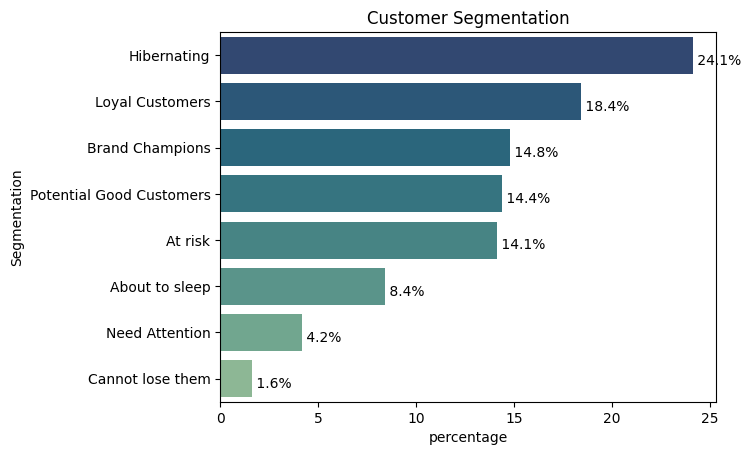

In [52]:
#Visualizing the segments
Segments = (rfm['Segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
Segments = Segments.round(1)
b =sns.barplot(y='index',x='percentage', data=Segments, palette = 'crest_r')
for i, v in enumerate(Segments['percentage']):
    b.text(v,i+0.20," {:.1f}".format(v)+"%", color='black', ha="left")
    b.set_ylabel('Segmentation')
    b.set_title('Customer Segmentation')

From the analysis:

*   Around 24% of customers have not made a purchase in a long time and do not purchase often.
*   Around 18% of customers make purchases frequently and are likely to recomment the business to others.
*   Around 14% of customers are likely to churn and stop making purchases.


